In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import warnings; warnings.simplefilter('ignore')
from sklearn.preprocessing import StandardScaler

In [2]:
data_train=pd.read_csv("/content/drive/My Drive/DATASETIOT/UNSW_2018_IoT_Botnet_Final_10_best_Training.csv")

In [3]:
data_test=pd.read_csv("/content/drive/My Drive/DATASETIOT/UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv")

In [4]:
data_train.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,DDoS,UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,DDoS,TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,DDoS,TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,DoS,UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,DDoS,UDP


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2934817 entries, 0 to 2934816
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   pkSeqID            int64  
 1   proto              object 
 2   saddr              object 
 3   sport              object 
 4   daddr              object 
 5   dport              object 
 6   seq                int64  
 7   stddev             float64
 8   N_IN_Conn_P_SrcIP  int64  
 9   min                float64
 10  state_number       int64  
 11  mean               float64
 12  N_IN_Conn_P_DstIP  int64  
 13  drate              float64
 14  srate              float64
 15  max                float64
 16  attack             int64  
 17  category           object 
 18  subcategory        object 
dtypes: float64(6), int64(6), object(7)
memory usage: 425.4+ MB


In [6]:
data_train.shape

(2934817, 19)

In [7]:
data_test.shape

(733705, 19)

In [8]:
data_train.isnull().sum()

pkSeqID              0
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64

In [9]:
data_train.drop(["pkSeqID","seq","subcategory"], axis=1, inplace=True)

In [10]:
data_test.drop(["pkSeqID","seq","subcategory"], axis=1, inplace=True)

In [11]:
data_train.dtypes[data_train.dtypes=='object']

proto       object
saddr       object
sport       object
daddr       object
dport       object
category    object
dtype: object

In [12]:
data_train['saddr'].value_counts()

192.168.100.147              761360
192.168.100.148              738642
192.168.100.150              712260
192.168.100.149              711466
192.168.100.3                  6609
192.168.100.5                  4107
192.168.100.6                   272
192.168.100.7                    34
192.168.100.4                    17
192.168.100.1                    14
192.168.100.27                    9
192.168.100.46                    8
fe80::250:56ff:febe:254           5
192.168.100.55                    3
fe80::250:56ff:febe:c038          2
fe80::250:56ff:febe:26db          2
fe80::2c6a:ff9b:7e14:166a         2
fe80::250:56ff:febe:89ee          2
fe80::c0c0:aa20:45b9:bdd9         2
fe80::250:56ff:febe:e9d9          1
Name: saddr, dtype: int64

In [13]:
data_train['sport'].value_counts()

0x0303    7156
80        3220
1822       878
60541      869
1216       868
          ... 
32047       31
39305       30
18992       30
0x000d      10
0x0011       8
Name: sport, Length: 65541, dtype: int64

In [14]:
data_train['daddr'].value_counts()

192.168.100.3      1900562
192.168.100.5       361192
192.168.100.7       332161
192.168.100.6       329679
192.168.100.150       3040
                    ...   
156.154.100.3            1
205.251.194.201          1
205.251.196.160          1
205.251.199.194          1
205.251.198.119          1
Name: daddr, Length: 81, dtype: int64

In [15]:
data_train['dport'].value_counts()

80       2858794
1           5379
3306        3757
53           275
-1           166
          ...   
2238           1
48287          1
41710          1
48332          1
36950          1
Name: dport, Length: 6906, dtype: int64

In [16]:
data_train['category'].value_counts()

DDoS              1541315
DoS               1320148
Reconnaissance      72919
Normal                370
Theft                  65
Name: category, dtype: int64

In [17]:
data_train.shape

(2934817, 16)

In [18]:
indexNames = data_train[data_train['category']=='Theft'].index
data_train.drop(indexNames , inplace=True)

In [19]:
indexNames = data_train[data_train['category']=='Normal'].index
data_train.drop(indexNames , inplace=True)

In [20]:
data_train.shape

(2934382, 16)

In [21]:
data_train['sport']=data_train['sport'].replace(['0x0303'],'771') 
data_train['sport']=data_train['sport'].replace(['0x0011'],'17')
data_train['sport']=data_train['sport'].replace(['0x000d'],'13')
data_train['sport']=data_train['sport'].replace(['0x0008'],'8')

In [22]:
data_train["sport"] = data_train["sport"].astype(str).astype(int)

In [23]:
data_test['sport']=data_test['sport'].replace(['0x0303'],'771') 
data_test['sport']=data_test['sport'].replace(['0x0011'],'17')
data_test['sport']=data_test['sport'].replace(['0x000d'],'13')
data_test['sport']=data_test['sport'].replace(['0x0008'],'8')

In [24]:
data_test["sport"] = data_test["sport"].astype(str).astype(int)

In [25]:
data_train['dport']=data_train.dport.apply(lambda x: int(x,16) if len(x)>1 and x[1]=="x" else int(x))

In [26]:
data_test['dport']=data_test.dport.apply(lambda x: int(x,16) if len(x)>1 and x[1]=="x" else int(x))

In [27]:
data_train['dport'].value_counts()

80       2858779
1           5379
3306        3755
465          161
993          161
          ...   
9031           1
37712          1
9030           1
37715          1
13117          1
Name: dport, Length: 6773, dtype: int64

In [28]:
data_train['sport'].value_counts()

771      7203
80       3209
1822      878
60541     869
1216      868
         ... 
27738      31
39364      31
7813       31
18992      30
39305      30
Name: sport, Length: 65537, dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_train["saddr_enc"]= le.fit_transform(data_train.saddr)
data_train["daddr_enc"]= le.fit_transform(data_train.daddr)
data_train["proto_enc"]= le.fit_transform(data_train.proto)
data_train["category_enc"]= le.fit_transform(data_train.category)
data_train.drop(['saddr','daddr','proto','category'], axis=1, inplace=True)

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_test["saddr_enc"]= le.fit_transform(data_test.saddr)
data_test["daddr_enc"]= le.fit_transform(data_test.daddr)
data_test["proto_enc"]= le.fit_transform(data_test.proto)
data_test["category_enc"]= le.fit_transform(data_test.category)
data_test.drop(['saddr','daddr','proto','category'], axis=1, inplace=True)

In [31]:
data_train.head()

,sport,dport,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,saddr_enc,daddr_enc,proto_enc,category_enc
0,6551,80,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,3,4,3,0
1,5532,80,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,3,4,2,0
2,27165,80,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,0,4,2,0
3,48719,80,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,3,4,3,1
4,22461,80,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,0,4,3,0


In [32]:
data_train['category_enc'].value_counts()

0    1541315
1    1320148
2      72919
Name: category_enc, dtype: int64

In [33]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2934382 entries, 0 to 2934816
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   sport              int64  
 1   dport              int64  
 2   stddev             float64
 3   N_IN_Conn_P_SrcIP  int64  
 4   min                float64
 5   state_number       int64  
 6   mean               float64
 7   N_IN_Conn_P_DstIP  int64  
 8   drate              float64
 9   srate              float64
 10  max                float64
 11  attack             int64  
 12  saddr_enc          int64  
 13  daddr_enc          int64  
 14  proto_enc          int64  
 15  category_enc       int64  
dtypes: float64(6), int64(10)
memory usage: 380.6 MB


In [34]:
y_train=data_train["category_enc"]

In [35]:
y_test=data_test["category_enc"]

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features = data_train.iloc[:,:-1]
cols=features.columns
scaled_features= scaler.fit_transform(features)
data_train= pd.DataFrame(scaled_features,columns=cols)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features = data_test.iloc[:,:-1]
cols=features.columns
scaled_features= scaler.fit_transform(features)
data_test= pd.DataFrame(scaled_features,columns=cols)

In [38]:
data_train.head()

,sport,dport,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,saddr_enc,daddr_enc,proto_enc
0,-1.380839,-0.093994,1.260872,0.715398,-0.685704,0.729306,0.300989,0.415117,-0.007602,-0.005638,0.543863,0.0,1.339437,-0.629945,0.910667
1,-1.434151,-0.093994,-1.006793,-1.827708,1.914031,-0.113115,1.122922,0.415117,-0.007602,-0.006392,0.533816,0.0,1.339437,-0.629945,-1.075645
2,-0.302362,-0.093994,-0.769541,0.715398,1.318966,-0.113115,0.731858,0.415117,-0.007602,-0.006271,0.316849,0.0,-1.306088,-0.629945,-1.075645
3,0.825293,-0.093994,1.164835,-0.802262,-0.685704,0.729306,0.653713,-1.624605,-0.007602,-0.005743,1.033284,0.0,1.339437,-0.629945,0.910667
4,-0.548465,-0.093994,-0.080476,0.715398,1.322940,0.729306,1.154744,0.415117,-0.007602,-0.004028,1.061310,0.0,-1.306088,-0.629945,0.910667


In [39]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2934382 entries, 0 to 2934381
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   sport              float64
 1   dport              float64
 2   stddev             float64
 3   N_IN_Conn_P_SrcIP  float64
 4   min                float64
 5   state_number       float64
 6   mean               float64
 7   N_IN_Conn_P_DstIP  float64
 8   drate              float64
 9   srate              float64
 10  max                float64
 11  attack             float64
 12  saddr_enc          float64
 13  daddr_enc          float64
 14  proto_enc          float64
dtypes: float64(15)
memory usage: 335.8 MB


In [40]:
y_train.value_counts()

0    1541315
1    1320148
2      72919
Name: category_enc, dtype: int64

In [41]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
samp_strat= { 0 : 72919, 1 : 72919, 2 : 72919}
random_under= RandomUnderSampler(sampling_strategy=samp_strat,random_state=1)
Xres,yres = random_under.fit_resample(data_train,y_train)

In [42]:
pd.Series(yres).value_counts()

2    72919
1    72919
0    72919
dtype: int64

In [43]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(Xres, yres)
pred= logisticRegr.predict(data_test)
score = logisticRegr.score(data_test, y_test)
score

0.9588281393748168

In [44]:
from sklearn.metrics import classification_report,confusion_matrix
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.98    385309\n           1       0.99      0.98      0.98    330112\n           2       0.00      0.13      0.00       107\n           3       0.00      0.00      0.00     18163\n           4       0.00      0.00      0.00        14\n\n    accuracy                           0.96    733705\n   macro avg       0.39      0.42      0.39    733705\nweighted avg       0.96      0.96      0.96    733705\n'

In [45]:
confusion_matrix(y_test,pred)

array([[380962,   2502,   1845,      0,      0],
       [  7423, 322521,    168,      0,      0],
       [    12,     81,     14,      0,      0],
       [   424,    522,  17217,      0,      0],
       [     0,      5,      9,      0,      0]])

In [46]:
from sklearn.metrics import f1_score
f1_score(y_test,pred,average='micro')

0.9588281393748168

In [47]:
from sklearn.metrics import recall_score
recall_score(y_test, pred, average='micro')

0.9588281393748168

In [48]:
from sklearn.metrics import precision_score
precision_score(y_test,pred, average='micro')

0.9588281393748168

In [49]:
y_test


0         1
1         0
2         0
3         0
4         1
         ..
733700    1
733701    0
733702    0
733703    1
733704    0
Name: category_enc, Length: 733705, dtype: int64

In [50]:
y_pred_proba=logisticRegr.predict_proba(data_test)


In [51]:
sklearn.metrics.roc_auc_score(y_test, y_pred_proba,  multi_class='ovo')

ValueError: ignored

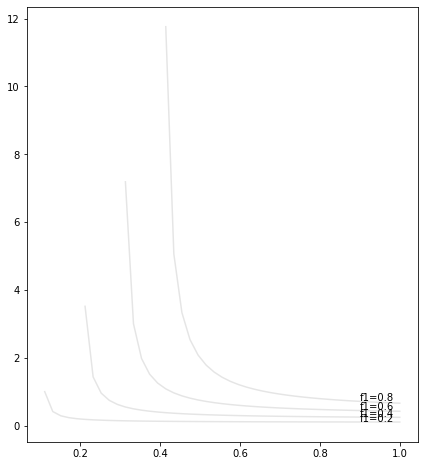

In [52]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f1_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f1_score * x / (2 * x - f1_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f1_score), xy=(0.9, y[45] + 0.02))
lines.append(l)
labels.append('iso-f1 curves')
plt.show()

In [53]:
lr2 = LogisticRegression(penalty='l2',C = 3, solver = 'lbfgs',max_iter=1000,n_jobs=100)
lr2.fit (Xres,yres)
prediction= lr2.predict(data_test)
score = lr2.score(data_test, y_test)
score


0.9614708908893902

In [54]:
logModel = LogisticRegression()
param_grid = [    
    {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25] }]

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=3)

In [57]:
best_clf = clf.fit(data_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] C=0.001, penalty=l1 .............................................
[CV] ................... C=0.001, penalty=l1, score=nan, total=   0.2s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................... C=0.001, penalty=l1, score=nan, total=   0.1s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................... C=0.001, penalty=l1, score=nan, total=   0.2s
[CV] C=0.001, penalty=l2 .............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ................. C=0.001, penalty=l2, score=0.976, total= 1.2min
[CV] C=0.001, penalty=l2 .............................................
[CV] ................. C=0.001, penalty=l2, score=0.976, total= 1.2min
[CV] C=0.001, penalty=l2 .............................................
[CV] ................. C=0.001, penalty=l2, score=0.976, total= 1.3min
[CV] C=0.009, penalty=l1 .............................................
[CV] ................... C=0.009, penalty=l1, score=nan, total=   0.2s
[CV] C=0.009, penalty=l1 .............................................
[CV] ................... C=0.009, penalty=l1, score=nan, total=   0.1s
[CV] C=0.009, penalty=l1 .............................................
[CV] ................... C=0.009, penalty=l1, score=nan, total=   0.1s
[CV] C=0.009, penalty=l2 .............................................
[CV] ................. C=0.009, penalty=l2, score=0.984, total= 1.2min
[CV] C=0.009, penalty=l2 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 29.6min finished


In [58]:
best_clf.best_score_

0.9862499156898746

In [59]:
best_clf.best_params_

{'C': 10, 'penalty': 'l2'}

In [60]:
lr2 = LogisticRegression(penalty='l2',C = 10, solver = 'lbfgs',max_iter=1000,n_jobs=100)
lr2.fit (Xres,yres)
prediction= lr2.predict(data_test)
score = lr2.score(data_test, y_test)
score

0.9635671012191548

In [61]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr2, Xres, yres, cv=10)
scores

array([0.97997806, 0.9786524 , 0.98107515, 0.98006948, 0.97929238,
       0.97883525, 0.98029804, 0.98038857, 0.97929143, 0.98189714])

In [62]:
scores.mean()

0.9799777910822037